In [1]:
from metaflow import Flow, get_metadata, namespace
import matplotlib.pyplot as plt
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/mnt/c/gitproj/machine-learning-projects/mri-master-linux


In [2]:
# Set namespace to None to search over all namespaces
namespace(None)
run = Flow("TumorAnalysisModel").latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('TumorAnalysisModel/1726418397967835')


In [3]:
run.data

<MetaflowData: device, image_path, load_params, loss_history, metric_history, mode, model, model_params, name, train_loader, train_params, val_loader>

In [4]:
model = run.data.model
model

CNN_TUMOR(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=12544, out_features=100, bias=True)
    (6): Linear(in_features=100, out_features=2

In [5]:
def predict(image):
        from utils import preprocess_image
        import torch
        # Preprocess the image
        image = preprocess_image(image)
        # Run the model on the input image
        with torch.no_grad():  # Disable gradient computation for faster inference
            output = model(image)
        # Optionally, apply softmax to get probabilities
        probabilities = torch.nn.functional.softmax(output, dim=1)
        
        # Get the predicted class (assuming single-label classification)
        _, predicted_class = torch.max(probabilities, 1)
        
        return "Healthy" if predicted_class.item() else "Tumor Cancor", probabilities

In [9]:
print(run.data.image_path)
from PIL import Image
predict(Image.open(run.data.image_path).convert('RGB'))

pred_examples/not cancer.jpg


('Tumor Cancor', tensor([[1.0000e+00, 1.7339e-12]]))

In [24]:
namespace(None)
run = Flow("FineTuneDropoutRate").latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('FineTuneDropoutRate/1726468093918106')


In [27]:
loss_history = run.data.loss_history
metric_history = run.data.metric_history

Text(0, 0.5, 'Loss_val')

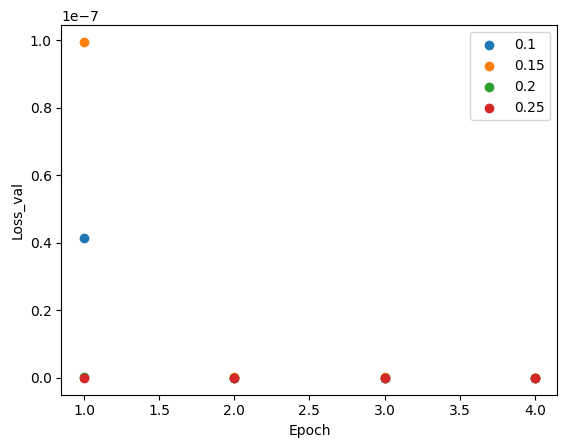

In [26]:
import matplotlib.pyplot as plt
epochs = range(1,5)
dropout_rate = [0.1,0.15,0.2,0.25]
for i, rate in enumerate(dropout_rate):
    plt.scatter(epochs,loss_history[i]['val'],label=rate)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss_val")

Text(0, 0.5, 'Acc_val')

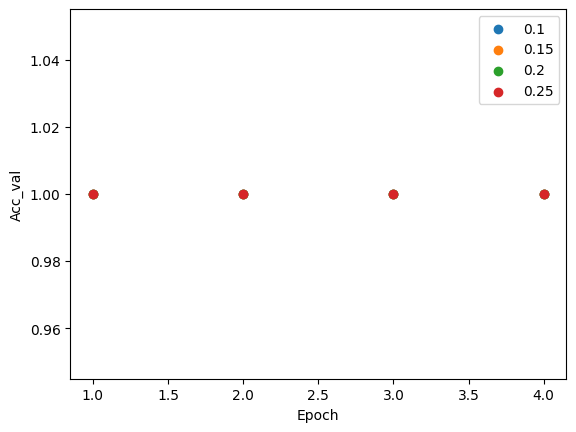

In [28]:
for i, rate in enumerate(dropout_rate):
    plt.scatter(epochs,metric_history[i]['val'],label=rate)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Acc_val")